In [1]:
import numpy as np
from tqdm import tqdm
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable

from utils import *

In [2]:
use_xenon_plot_style()

In [3]:
files = glob.glob('../cache/*.pkl')

for fn in files:
    print(decode_energy(fn), fn)

6.0 ../cache/BetaInLXe_E_0X1o8000000000000P+2.pkl
4.0 ../cache/BetaInLXe_E_0X1o0000000000000P+2.pkl
3.0 ../cache/BetaInLXe_E_0X1o8000000000000P+1.pkl
14.0 ../cache/BetaInLXe_E_0X1oC000000000000P+3.pkl
8.0 ../cache/BetaInLXe_E_0X1o0000000000000P+3.pkl
7.0 ../cache/BetaInLXe_E_0X1oC000000000000P+2.pkl
10.0 ../cache/BetaInLXe_E_0X1o4000000000000P+3.pkl
12.0 ../cache/BetaInLXe_E_0X1o8000000000000P+3.pkl
13.0 ../cache/BetaInLXe_E_0X1oA000000000000P+3.pkl
5.0 ../cache/BetaInLXe_E_0X1o4000000000000P+2.pkl
11.0 ../cache/BetaInLXe_E_0X1o6000000000000P+3.pkl
15.0 ../cache/BetaInLXe_E_0X1oE000000000000P+3.pkl
2.0 ../cache/BetaInLXe_E_0X1o0000000000000P+1.pkl
9.0 ../cache/BetaInLXe_E_0X1o2000000000000P+3.pkl


In [122]:
def make_plot(data, Energy, Field):
    alpha = np.unique(data['alpha'])
    beta = np.unique(data['beta'])
    a, b = np.meshgrid(alpha, beta)
    
    nest_recomb, nest_recomb_fluc = nest_er_recomb(Energy=Energy, Field=Field)
    print(nest_recomb_fluc)
    
    fig, axes = plt.subplots(1, 2, figsize=(23, 8))

    ax = axes[0]
    contour = ax.contourf(a, b, np.mean(data['recomb'], axis=1).reshape(np.shape(a)).T,
                          vmin=0, vmax=1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    plt.colorbar(
        ScalarMappable(norm=contour.norm, cmap=contour.cmap), 
        cax=cax,
        ticks=np.linspace(0, 1, 6),
    )
    ax.set_title('Mean recomb (Field=%i V/cm, Energy=%i keV)' % (Field, Energy))
    ax.set_xlabel(r'$\alpha$ [$\mu$m]')
    ax.set_ylabel(r'$\beta$ [$\mu$m$^{2}$/eV]')
    ax.scatter([est_alpha], [est_beta], marker='.', color='red', s=300, label='Eyeball fit')
    l = ax.legend()
    plt.setp(l.get_texts(), color='w')

    ax = axes[1]
    contour = ax.contourf(a, b, np.std(data['recomb'], axis=1).reshape(np.shape(a)).T)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    plt.colorbar(
        ScalarMappable(norm=contour.norm, cmap=contour.cmap), 
        cax=cax,
        ticks=np.linspace(0, 5e-2, 6),
    )
    ax.set_title('Recomb fluct (Field=%i V/cm, Energy=%i keV)' % (Field, Energy))
    ax.set_xlabel(r'$\alpha$ [$\mu$m]')
    ax.set_ylabel(r'$\beta$ [$\mu$m$^{2}$/eV]')
    ax.scatter([est_alpha], [est_beta], marker='.', color='red', s=300, label='Eyeball fit')
    l = ax.legend()
    plt.setp(l.get_texts(), color='w')
    
#     ax = axes[2]
#     ax.contour(a, b, np.mean(data['recomb'], axis=1).reshape(np.shape(a)).T, levels=[nest_recomb])
#     ax.contour(a, b, np.std(data['recomb'], axis=1).reshape(np.shape(a)).T, levels=[nest_recomb_fluc])

#     ax.set_xlim(0, 1)
#     ax.set_ylim(0, 3)

10.0
0.02385499272016735


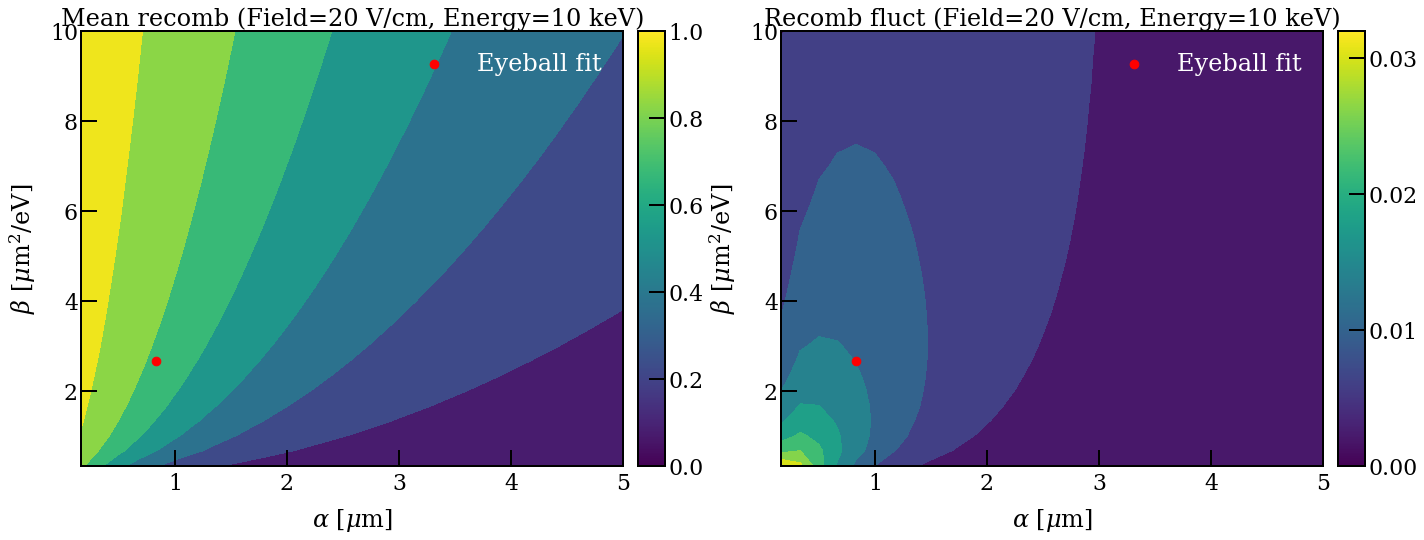

In [125]:
fn = files[6]#[-5]
Field = 20
data = np.load(fn, allow_pickle=True)
print(decode_energy(fn))
make_plot(data, Energy=decode_energy(fn), Field=Field)

plt.savefig("mTI_map_%i_keV_%i_Vcm.png" % (decode_energy(fn), Field), dpi=300)
plt.show()

In [59]:
# est_alpha = data[np.argmin(np.abs(data['alpha']-0.5))]['alpha']
# est_beta = data[np.argmin(np.abs(data['beta']-0.7))]['beta']

est_alpha = data[np.argmin(np.abs(data['alpha']-0.8))]['alpha']
est_beta = data[np.argmin(np.abs(data['beta']-2.7))]['beta']

In [60]:
ind = np.argwhere((data['alpha']==est_alpha) & (data['beta']==est_beta))[0,0]+1

In [61]:
energy = []
r = []
r_fluc = []
r_dist = []

for fn in files:
    
    data = np.load(fn, allow_pickle=True)
    energy.append(decode_energy(fn))
    _r = data[ind]['recomb']
    
    r.append(np.mean(_r))
    r_fluc.append(np.std(_r))
    r_dist.append(_r)
    
sort_map = np.argsort(energy)
energy = np.array(energy)[sort_map]
r = np.array(r)[sort_map]
r_fluc = np.array(r_fluc)[sort_map]
r_dist = np.array(r_dist)[sort_map]

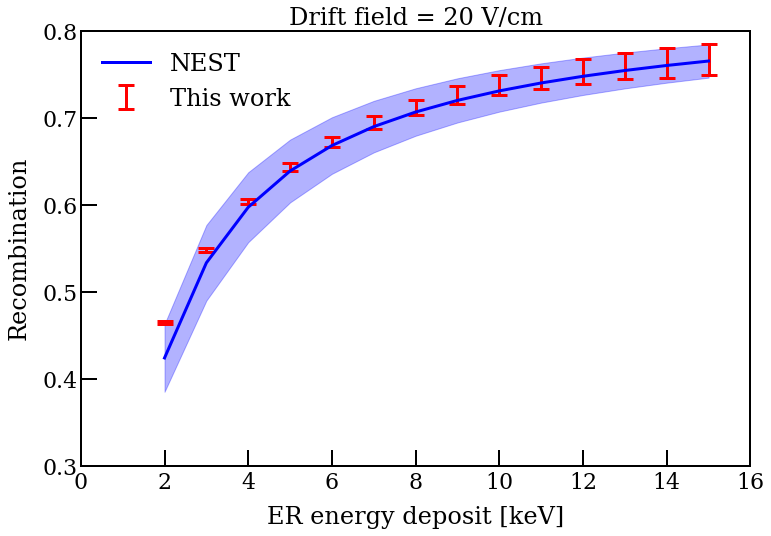

In [63]:
plt.errorbar(energy, r, yerr=r_fluc, ls='', color='red', label='This work')

nest_recomb = np.array([nest_er_recomb(e, Field=Field)[0] for e in energy])
nest_recomb_fluc = np.array([nest_er_recomb(e, Field=Field)[1] for e in energy])

plt.plot(energy, nest_recomb, color='blue', label='NEST')
plt.fill_between(energy, nest_recomb-nest_recomb_fluc, nest_recomb+nest_recomb_fluc, color='blue', alpha=0.3)

plt.xlabel('ER energy deposit [keV]')
plt.ylabel('Recombination')
plt.ylim(0.3, 0.8)
plt.xlim(0, 16)
plt.legend()
plt.title('Drift field = %i V/cm' % Field)

plt.savefig('mTI_recomb_%i_Vcm.png' % Field, dpi=300)
plt.show()

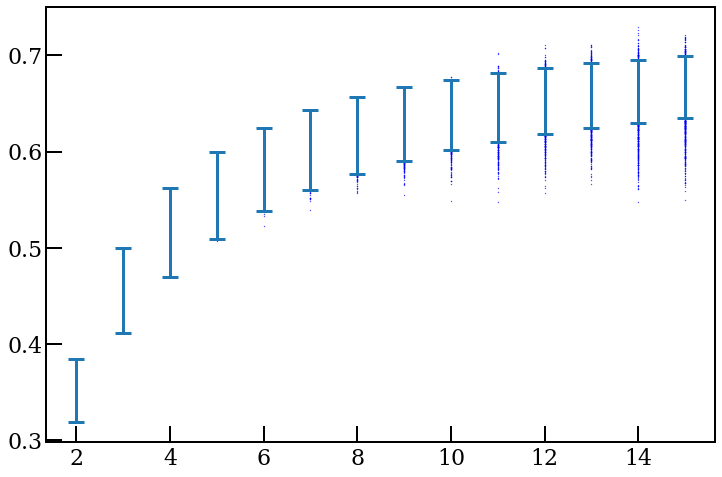

In [80]:

nest_recomb = np.array([nest_er_recomb(e, Field=Field)[0] for e in energy])
nest_recomb_fluc = np.array([nest_er_recomb(e, Field=Field)[1] for e in energy])

# xenon1t_recomb = np.array([xenon1t_er_recomb(e, Field=Field)[0] for e in energy])
# xenon1t_recomb_fluc = np.array([xenon1t_er_recomb(e, Field=Field)[1] for e in energy])

plt.errorbar(energy, nest_recomb, xerr=0, yerr=nest_recomb_fluc, ls='')

# plt.errorbar(energy, xenon1t_recomb, xerr=0, yerr=xenon1t_recomb_fluc, ls='')

for i in range(len(energy)):
    plt.scatter(np.full_like(r_dist[i], energy[i]), r_dist[i], s=0.1, color='blue')
    

In [82]:
sorted(energy)
sorted()

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]

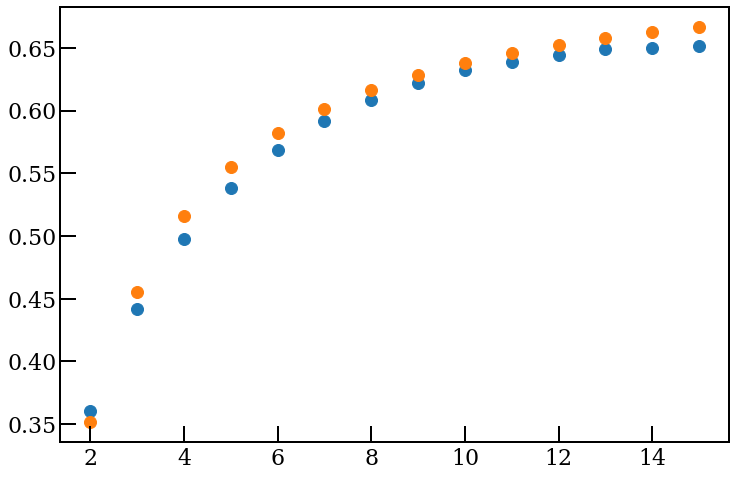

In [50]:
plt.scatter(energy, r)
plt.scatter(energy, [nest_er_recomb(e, Field=Field)[0] for e in energy])

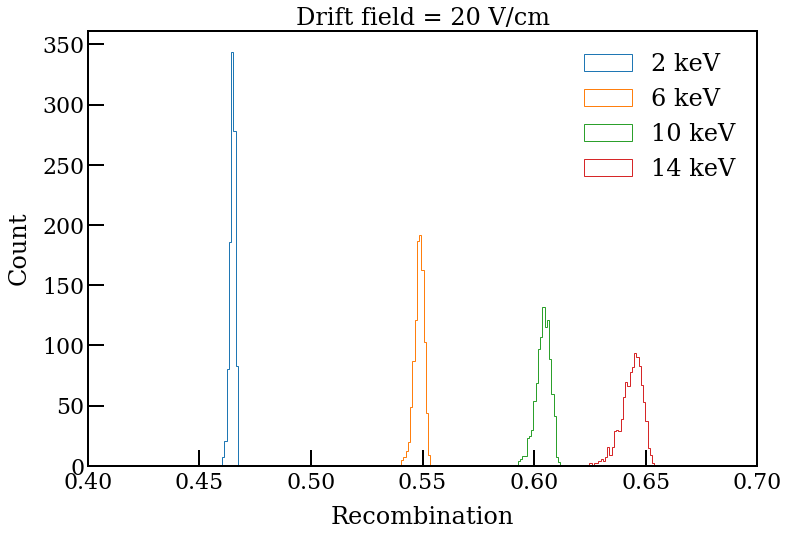

In [126]:
for i, e in enumerate(energy[0::4]):
    plt.hist(r_dist[i], bins=np.linspace(0.4, 0.7, 300), histtype='step', label='%i keV' %e)

plt.legend()
plt.title('Drift field = %i V/cm' % Field)
plt.xlabel('Recombination')
plt.ylabel('Count')
plt.xlim(0.4, 0.7)

plt.savefig('mTI_recomb_dist_%i_Vcm.png' % Field, dpi=300)
plt.show()

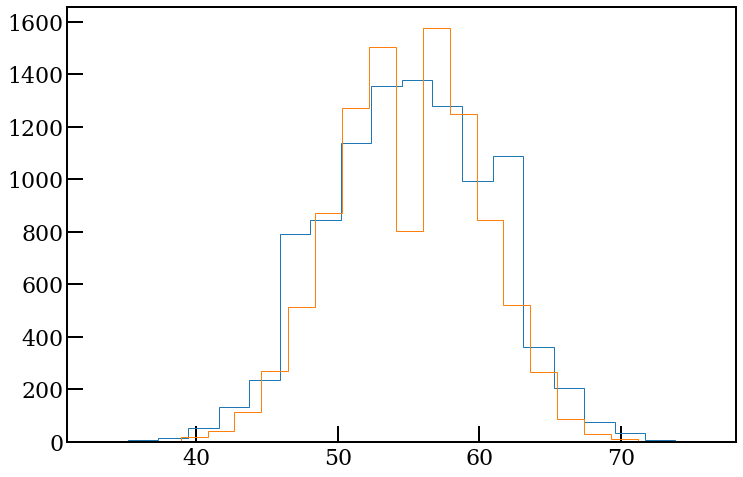

In [143]:
N = 100
n = np.zeros(10000)
m = np.zeros(10000)

for i in range(10000):
    r = np.random.uniform(0.5, 0.6)
    n[i] = np.random.binomial(N, r)
for i in range(10000):
    r = 0.55
    m[i] = np.random.binomial(N, r)
    
    
plt.hist(n, bins=20, histtype='step')
plt.hist(m, bins=20, histtype='step')
plt.show()